In [1]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas
import numpy as np
import matplotlib.pyplot as plt



In [5]:
tab =[0]
tab.append(1)
tab

[0, 1]

In [6]:
data = pandas.read_csv("sird_dataset.csv" , sep=",")
data

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,-0.002455,-0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,-0.001515
3,3,0.988132,0.008969,-0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894
...,...,...,...,...,...
85,85,0.072998,0.004650,0.829414,0.079243
86,86,0.077714,-0.005786,0.846965,0.085430
87,87,0.073599,0.010464,0.844571,0.084902
88,88,0.074212,0.004219,0.836580,0.076309


## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
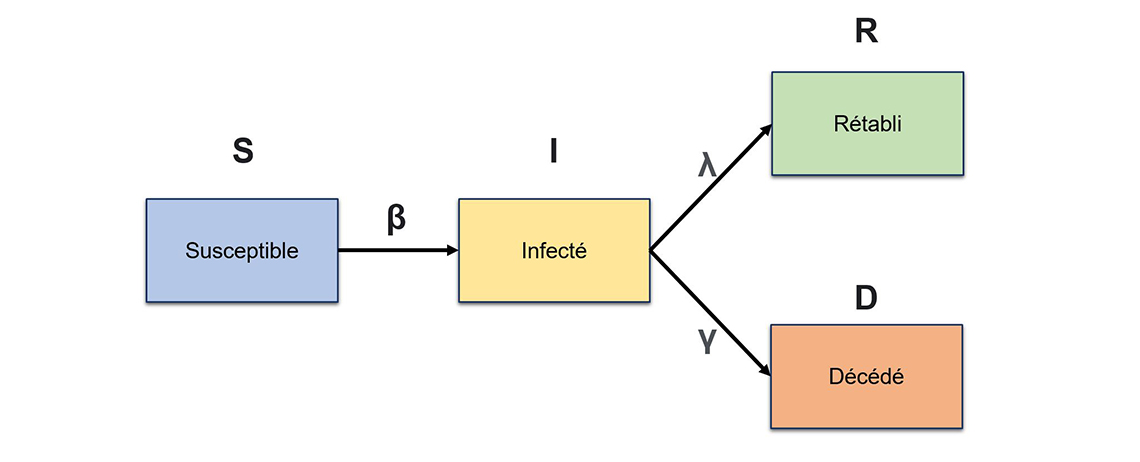


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [7]:
#0 et 1
def sird_forcast(beta, gama, mu, duration,would_be_infected0=0.998894, infected0=0.003197, cure0=0.002455,died0=0.004622, step=0.01 ):
    would_be_infecteds=[would_be_infected0]
    infecteds=[infected0]
    cures=[cure0]
    dieds=[died0]
    jour=[0]
    
    for i in range(0, int(duration/step)):
        
        would_be_infected = -step*(beta*would_be_infecteds[-1]*infecteds[-1]) + would_be_infecteds[-1]
        infected = step*((beta*would_be_infecteds[-1]*infecteds[-1])-(gama*infecteds[-1])-(mu*infecteds[-1])) + infecteds[-1]
        cure = step*(gama*infecteds[-1]) + cures[-1]
        died = step*(mu*infecteds[-1]) +dieds[-1]

        would_be_infecteds.append(would_be_infected)
        infecteds.append(infected)
        cures.append(cure)
        dieds.append(died)
        jour.append(jour[-1] + step)
        sir_data_predict = pandas.DataFrame({   "Jour":jour,
                                "Susceptibles":would_be_infecteds,
                                 "Infectés":infecteds,
                                 "Rétablis":cures,
                                 "Décès":dieds})
    return sir_data_predict[::101]

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [8]:
#1
beta = 0.5
gama = 0.15
mu = 0.015
nb_jour = 90
would_be_infecteds = 0.99
infecteds = 0.01
cures = 0
dieds = 0
step = 0.01

sir_data_predict= sird_forcast(beta, gama, mu, nb_jour, would_be_infecteds, infecteds, cures, dieds, step)

sir_data_predict

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0.00,0.990000,0.010000,0.000000,0.000000
101,1.01,0.984098,0.013929,0.001794,0.000179
202,2.02,0.975951,0.019333,0.004288,0.000429
303,3.03,0.964780,0.026705,0.007741,0.000774
404,4.04,0.949608,0.036646,0.012496,0.001250
...,...,...,...,...,...
8585,85.85,0.056710,0.000047,0.857494,0.085749
8686,86.86,0.056708,0.000041,0.857501,0.085750
8787,87.87,0.056707,0.000035,0.857507,0.085751
8888,88.88,0.056706,0.000031,0.857512,0.085751


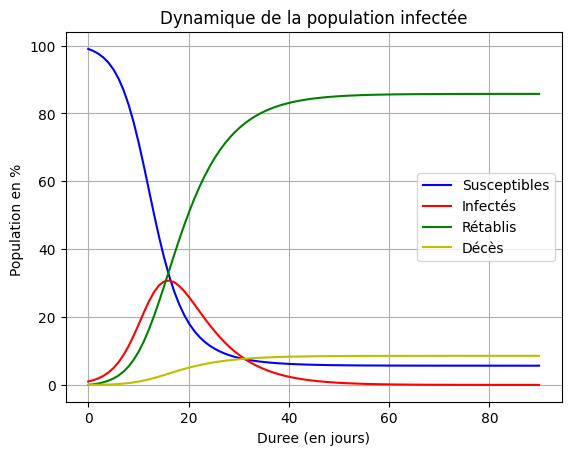

In [9]:
#2 
def plot_function(would_be_infecteds,infecteds,cures,dieds,jour):
		plt.plot(jour, would_be_infecteds*100, "b", label = "Susceptibles")
		plt.grid()
		plt.plot(jour, infecteds*100, "r", label = "Infectés")
		plt.plot(jour, cures*100, "g", label = "Rétablis")
		plt.plot(jour, dieds*100, "y", label = "Décès")
		plt.xlabel("Duree (en jours)")
		plt.ylabel("Population en % ")
		plt.title("Dynamique de la population infectée")	
		plt.legend()
		plt.show()
		
plot_function(sir_data_predict
["Susceptibles"], sir_data_predict
["Infectés"],sir_data_predict
["Rétablis"],sir_data_predict
["Décès"],sir_data_predict
["Jour"])    


## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [20]:
#1
sir_dataset = pandas.read_csv("sird_dataset.csv")
sir_dataset.Name ="best"
print(sir_dataset.Name)
sir_dataset


best


,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,-0.002455,-0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,-0.001515
3,3,0.988132,0.008969,-0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894
...,...,...,...,...,...
85,85,0.072998,0.004650,0.829414,0.079243
86,86,0.077714,-0.005786,0.846965,0.085430
87,87,0.073599,0.010464,0.844571,0.084902
88,88,0.074212,0.004219,0.836580,0.076309


In [11]:
#2 fonction de cout MSE
import math   

def mse_error(data_predict,dataset,solutions = ['Susceptibles', 'Infectés', 'Rétablis', 'Décès']):
    n = len(dataset)
    error = 0
    
    for solution in solutions:
        error += math.sqrt(sum((data_predict[solution].values  - dataset[solution].values)**2)/n)
       
    return error
    

mse_error(sir_data_predict,sir_dataset)    
    
    

0.5198843260867495

### justification du choix de MSE
Dans notre ca nous somme en train de predire des valeurs contines donc la MSE est mieux adapter .
la CCE est utiliser sans les etude de classification

In [27]:
#3 Grid search
from tqdm.contrib.itertools import product

def grid_search(step, nb_jours, dataset):
	betas = np.linspace(0.25, 0.5, 5)
	gamas = np.linspace(0.08, 0.15, 5)
	mus = np.linspace(0.005 , 0.015, 5)
	

	best_beta, best_gama, best_mu = None, None, None
	best_rmse = float("inf")

	for beta, gama , mu in product(betas, gamas, mus):
		data_predict = sird_forcast(beta, gama, mu, nb_jours, would_be_infecteds, infecteds, cures, dieds, step)
		actual_rmse = mse_error(data_predict,dataset)
		if actual_rmse < best_rmse:
			best_rmse = actual_rmse
			best_beta, best_gama, best_mu = beta, gama , mu

	print(best_beta, best_gama, best_mu)
	best_sir_data_predict= sird_forcast(best_beta, best_gama, best_mu, nb_jour, would_be_infecteds, infecteds, cures, dieds, step)

	plot_function(best_sir_data_predict
["Susceptibles"], best_sir_data_predict
["Infectés"],best_sir_data_predict
["Rétablis"],best_sir_data_predict
["Décès"],best_sir_data_predict
["jour"])  
	return best_beta, best_gama, best_mu

grid_search(0.01, 90, sir_dataset)

  0%|          | 0/125 [00:00<?, ?it/s]

0.3125 0.11499999999999999 0.009999999999999998


KeyError: 'jour'

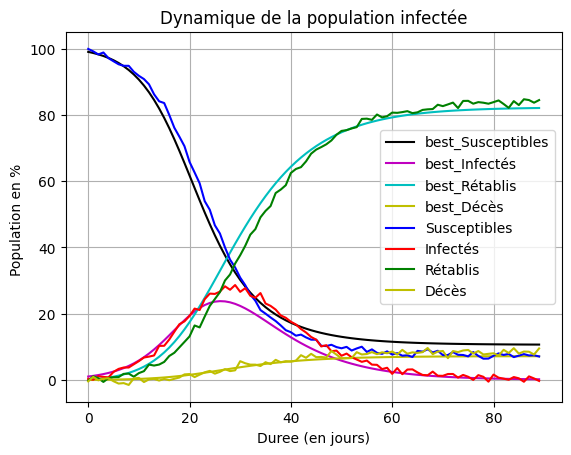

In [25]:
#4
best_sir_data_predict= sird_forcast(0.3125, 0.11499999999999999, 0.009999999999999998, nb_jour, would_be_infecteds, infecteds, cures, dieds, step)
best_sir_data_predict.Name = "best"
def plot_two_function(best_sir_data_predict, sir_dataset):
        plt.grid()
        
        plt.plot(data["Jour"]  , best_sir_data_predict["Susceptibles"]*100, "k", label = "best_Susceptibles")
        plt.plot(data["Jour"], best_sir_data_predict["Infectés"]*100, "m", label = "best_Infectés")
        plt.plot(data["Jour"], best_sir_data_predict["Rétablis"]*100, "c", label = "best_Rétablis")
        plt.plot(data["Jour"], best_sir_data_predict["Décès"]*100, "y", label = "best_Décès")
        plt.plot(data["Jour"]  , sir_dataset["Susceptibles"]*100, "b", label = "Susceptibles")
        plt.plot(data["Jour"], sir_dataset["Infectés"]*100, "r", label = "Infectés")
        plt.plot(data["Jour"], sir_dataset["Rétablis"]*100, "g", label = "Rétablis")
        plt.plot(data["Jour"], sir_dataset["Décès"]*100, "y", label = "Décès")

        plt.xlabel("Duree (en jours)")
        plt.ylabel("Population en % ")
        plt.title("Dynamique de la population infectée")	
        plt.legend()
        plt.show()
            
plot_two_function(best_sir_data_predict, sir_dataset)  

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.
 Si R0<1 

   beta < gamma + mu ce qui veux dir que le taux de transmission est tres petit : dans ce cas l'epidemie est entrain de disparaitr le nombre dinfecter va diminuer.

Si R0>1 
    beta > gamma + mu
    l'epidemie continue de se propager 

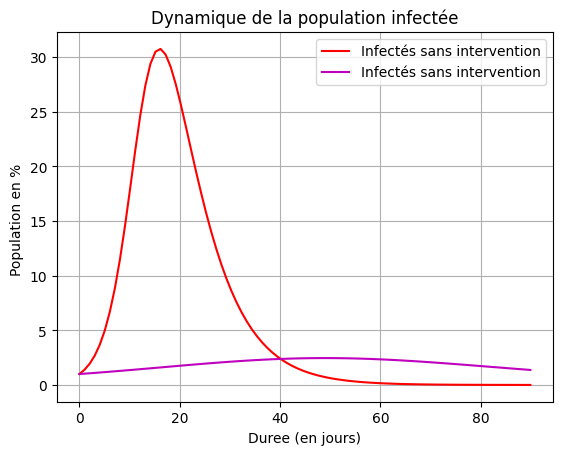

In [30]:
# 2 Analyse
sir_data_predict = sird_forcast(beta, gama, mu, nb_jour, would_be_infecteds, infecteds, cures, dieds, step)
#prediction des donnee avec une intevention (la réduction de beta)
low_beta = 0.2
sir_data_with_intervention = sird_forcast(low_beta, gama, mu, nb_jour, would_be_infecteds, infecteds, cures, dieds, step)
plt.grid()
plt.plot(sir_data_predict["Jour"], sir_data_predict["Infectés"]*100, "r", label = "Infectés sans intervention")
plt.plot(sir_data_with_intervention["Jour"], sir_data_with_intervention["Infectés"]*100, "m", label = "Infectés sans intervention")
plt.xlabel("Duree (en jours)")
plt.ylabel("Population en % ")
plt.title("Dynamique de la population infectée")	
plt.legend()
plt.show()




#3.
Sans intervention :L’épidémie L’épidémie explose et atteint un grand nombre de personnes avant de diminuer..
Avec intervention (distanciation sociale, confinement, masques.) :L’épidémie s’éteint progressivement.